In [6]:

!pip install pandas
import numpy as np
import pandas as pd
import skimage
from skimage import io
import skimage.segmentation
import matplotlib.pyplot as plt
from skimage.color import rgb2lab
from skimage import img_as_ubyte
import os


You should consider upgrading via the '/home/malou/Master/master-env/bin/python -m pip install --upgrade pip' command.


In [27]:
cell_annot_path = "/home/malou/Master/data/Annotationsets/Cell-annotationset-1and2/"
image_list = os.listdir(cell_annot_path)

results= pd.DataFrame(columns=["Area"])

for image in image_list:
    annot = skimage.io.imread(cell_annot_path + image)
    annot = skimage.morphology.label(annot)
    objects = len(np.unique(annot))

    area_true = np.histogram(annot, bins=objects)[0][1:]
    
    results = pd.concat([results, pd.DataFrame(data=np.asarray([area_true.copy()]).T, columns=["Area"])])

In [28]:
# removing largest value, since it is background
results = results.loc[results['Area']!=results['Area'].max()]

<AxesSubplot:title={'center':'Sizedistribution plot of Cell images (Cellannotationset1 + 2)'}, ylabel='Frequency'>

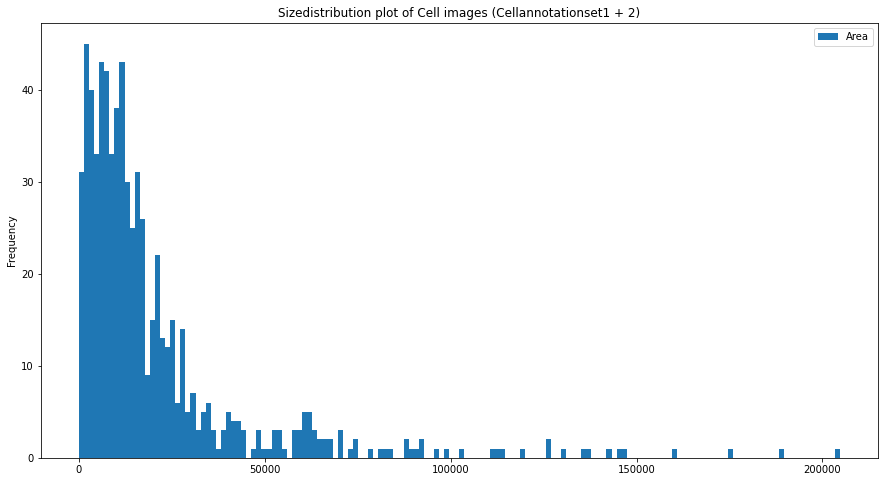

In [29]:
results.plot.hist(bins = 150, figsize=(15,8),title = 'Sizedistribution plot of Cell images (Cellannotationset1 + 2)')